In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import re
import random


from tensorflow.keras.applications import ResNet50, InceptionV3, InceptionResNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import cross_validate 
from sklearn.model_selection import ShuffleSplit

from PIL import Image

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, LabelEncoder

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

train_features_array = pd.read_csv('./train_features_crop_equalise.csv')

print(train_features_array.shape)

data_y = pd.read_csv('./train.csv')

df = pd.concat([pd.DataFrame(train_features_array), data_y['Label']], axis=1)

# print(df[0])

type_0 = df[df['Label'] == 0]
type_1 = df[df['Label'] == 1]
type_2 = df[df['Label'] == 2]
type_3 = df[df['Label'] == 3]

print(type_0.shape, type_1.shape, type_2.shape, type_3.shape)

type_0_train, type_0_test = train_test_split(type_0, test_size=0.3, random_state=42)
type_1_train, type_1_test = train_test_split(type_1, test_size=0.3, random_state=42)
type_2_train, type_2_test = train_test_split(type_2, test_size=0.3, random_state=42)
type_3_train, type_3_test = train_test_split(type_3, test_size=0.3, random_state=42)

train_set = pd.concat([type_0_train, type_1_train, type_2_train, type_3_train], axis=0)
test_set = pd.concat([type_0_test, type_1_test, type_2_test, type_3_test], axis=0)

print(train_set.shape, test_set.shape)


(2870, 2048)
(395, 2049) (826, 2049) (822, 2049) (827, 2049)
(2007, 2049) (863, 2049)


In [3]:
X_train = train_set.drop(columns=['Label'])
y_train = train_set['Label']

X_test = test_set.drop(columns=['Label'])
y_test = test_set['Label']

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2007, 2048) (2007,) (863, 2048) (863,)


# TREINO 

In [4]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [7]:
clf = MLPClassifier(
   activation='relu',
   alpha=0.01,
   beta_1=0.7,
   beta_2=0.999,
   early_stopping=False,
   epsilon=5e-05,
   solver='adam',
   max_iter= 300,
   random_state= 42,
   warm_start=False, 
   verbose=True,
   tol=1e-5,
   n_iter_no_change=13
   )
clf.fit(X_train_scaler, y_train)

Iteration 1, loss = 0.82563512
Iteration 2, loss = 0.24255897
Iteration 3, loss = 0.12054793
Iteration 4, loss = 0.08314043
Iteration 5, loss = 0.05056939
Iteration 6, loss = 0.04892762
Iteration 7, loss = 0.03073907
Iteration 8, loss = 0.02911927
Iteration 9, loss = 0.02053222
Iteration 10, loss = 0.01775320
Iteration 11, loss = 0.01661114
Iteration 12, loss = 0.01418506
Iteration 13, loss = 0.01288157
Iteration 14, loss = 0.01205570
Iteration 15, loss = 0.01151447
Iteration 16, loss = 0.01086337
Iteration 17, loss = 0.01069093
Iteration 18, loss = 0.00998449
Iteration 19, loss = 0.00947117
Iteration 20, loss = 0.00913625
Iteration 21, loss = 0.00901124
Iteration 22, loss = 0.00862713
Iteration 23, loss = 0.00848337
Iteration 24, loss = 0.00827953
Iteration 25, loss = 0.00821879
Iteration 26, loss = 0.00807336
Iteration 27, loss = 0.00781576
Iteration 28, loss = 0.00764592
Iteration 29, loss = 0.00752091
Iteration 30, loss = 0.00737844
Iteration 31, loss = 0.00727967
Iteration 32, los

c:\Users\pedro\anaconda3\envs\tf_2.7\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.01, beta_1=0.7, epsilon=5e-05, max_iter=300,
              n_iter_no_change=13, random_state=42, tol=1e-05, verbose=True)

# TESTE

In [8]:
predicted = clf.predict(X_test_scaler)
predict_prob = clf.predict_proba(X_test_scaler)[:, 1]
print('MLP Conjunto de teste score: {:.2f}%'.format(clf.score(X_test_scaler, y_test) * 100))

MLP Conjunto de teste score: 92.47%


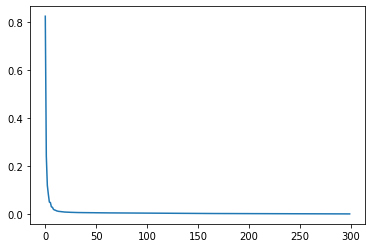

In [9]:
import matplotlib.pyplot as plt

plt.plot(clf.loss_curve_)
plt.show()

# VALIDAÇÃO

In [10]:
test_path = ('./test/')
dirs = os.listdir( test_path )
dirs.sort()
img_size= 224

test_label = []

for file in dirs:
    if ".jpg" in file:
        test_label.append(file.split('.')[0])

In [11]:
test_features_array = pd.read_csv('./teste_features_crop_equalise.csv')
X_validation_scaler = scaler.transform(test_features_array)

In [13]:
print(clf.classes_)

pandas_result = pd.DataFrame(predicted, test_label, columns = ['Label'])
pandas_result.to_csv('./MLP_MULTI.csv', index=True, index_label="ImageId")

[0 1 2 3]
